This Notebook is used to calcualte the Starlink Satellites Traces (Lat and Long) on the Earth. It does this by loading in the Starlink.txt file (describing Starlink Satellites as TLEs) and uses Bradon Rhodes SkyField API to propagate the satellites at a random point in a given month. This sampling approximates the Heatmap of the Starlink Sats for a given month. TLE SPG4 Propagation (especially for LEOs) isn't particularly accurate for epochs far in the future and far in the past, thus satellite traces must only be used as approximations.

In [20]:
from skyfield.api import load,wgs84
from skyfield.api import Loader, EarthSatellite

In [21]:
import matplotlib.pyplot as plt

In [22]:
import numpy as np
from multiprocessing import Pool
from skyfield.api import Topos
import random

In [23]:
sats=load.tle_file('Starlink/Starlink.txt')
ts=load.timescale()
eph=load('de421.bsp')
random.shuffle(sats)

In [27]:
def approximate_month_sat_trace(sats, month, year):
    detection_array = np.zeros((1800, 3600))
    for day in range(1,28):
        minute=random.randint(1,59)
        sec=random.randint(1,59)
        hour=random.randint(1,23)
        t0 = ts.utc(year, month, day, hour, minute, sec)
        for sat in sats:
            geocentric = sat.at(t0)
            subpoint=wgs84.subpoint_of(geocentric)
            try:
                lat=subpoint.latitude.degrees
                min_latitude=lat-10
                max_latitude=lat+10
                lon=subpoint.longitude.degrees
                min_longitude=lon-10
                max_longitude=lon+10
                detection_array[int(min_latitude*10):int(max_latitude*10),
                                int(min_longitude*10):int(max_longitude*10)]+=1
            except:
                continue
    return detection_array

Text(0.5, 1.0, 'January Trace of Starlink Satellites')

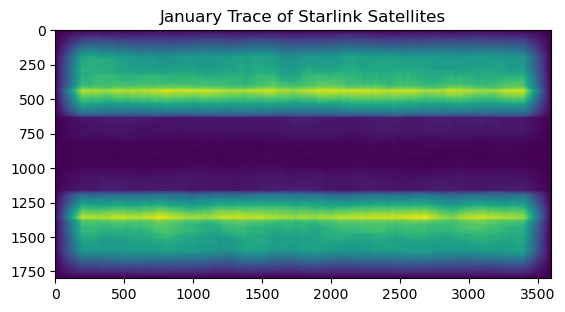

In [28]:
## January

month=1
year=2023

starlink_trace_jan=approximate_month_sat_trace(sats,month, year)
plt.imshow(starlink_trace_jan)
plt.title('January Trace of Starlink Satellites')



In [29]:
# Display
plt.imshow(detection_array_jan/np.max(detection_array_jan))
plt.title('Normalized Paths of Starlink Satellites (January)')
plt.xlabel('Longitude -180 to 180 degrees')
plt.ylabel('Latitude -90 to 90 degrees')
plt.colorbar()

NameError: name 'detection_array_jan' is not defined

In [ ]:
# Repeat for All Months 

detection_array_01=approximate_month_sat_trace(sats,1, 2023)
detection_array_02=approximate_month_sat_trace(sats,2, 2023)
detection_array_03=approximate_month_sat_trace(sats,3, 2023)
detection_array_04=approximate_month_sat_trace(sats,4, 2023)
detection_array_05=approximate_month_sat_trace(sats,5, 2023)
detection_array_06=approximate_month_sat_trace(sats,6, 2023)
detection_array_07=approximate_month_sat_trace(sats,7, 2023)
detection_array_08=approximate_month_sat_trace(sats,8, 2023)
detection_array_09=approximate_month_sat_trace(sats,9, 2023)
detection_array_10=approximate_month_sat_trace(sats,10, 2023)
detection_array_11=approximate_month_sat_trace(sats,11, 2023)
detection_array_12=approximate_month_sat_trace(sats,12, 2023)


# Normalize and Save the Detections as Numpy array for Each Month

np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_01.npy",(detection_array_01 / np.max(detection_array_1)) )
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_02.npy",(detection_array_02/ np.max(detection_array_02)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_03.npy",(detection_array_03/ np.max(detection_array_03)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_04.npy",(detection_array_04/ np.max(detection_array_04)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_05.npy",(detection_array_05/ np.max(detection_array_05)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_06.npy",(detection_array_06/ np.max(detection_array_06)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_07.npy",(detection_array_07/ np.max(detection_array_07)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_08.npy",(detection_array_08/ np.max(detection_array_08)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_09.npy",(detection_array_09/ np.max(detection_array_09)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_10.npy",(detection_array_10/ np.max(detection_array_10)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_11.npy",(detection_array_11/ np.max(detection_array_11)))
np.save("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_12.npy",(detection_array_12/ np.max(detection_array_12)))

If the data has already been saved, it can be loaded in.

In [15]:
Normalized_detection_array_01=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_01.npy")
Normalized_detection_array_02=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_02.npy")
Normalized_detection_array_03=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_03.npy")
Normalized_detection_array_04=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_04.npy")
Normalized_detection_array_05=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_05.npy")
Normalized_detection_array_06=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_06.npy")
Normalized_detection_array_07=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_07.npy")
Normalized_detection_array_08=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_08.npy")
Normalized_detection_array_09=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_09.npy")
Normalized_detection_array_10=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_10.npy")
Normalized_detection_array_11=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_11.npy")
Normalized_detection_array_12=np.load("Starlink/Produced Numpy Arrays/Normalized_Starlink_Trace_12.npy")

# Save the Images as a TIFF File

In [11]:
import numpy as np
import rasterio
def save_tiff(array,dst_file):
    dst_crs = "EPSG:4326"  # coordinate reference system
    dst_transform = rasterio.transform.from_bounds(-180, -90, 180, 90, 3600, 1800)
    with rasterio.open(
        dst_file,'w+',driver='GTiff',
        height=array.shape[0],
        width=array.shape[1],
        count=1, 
        dtype=array.dtype, 
        crs=dst_crs, 
        transform=dst_transform) as dst:
        dst.write(array,1)

## Normalize and Save each Trace

In [14]:
save_tiff(Normalized_detection_array_01,'Starlink/Produced Tiffs/Jan_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_02,'Starlink/Produced Tiffs/Feb_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_03,'Starlink/Produced Tiffs/Mar_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_04,'Starlink/Produced Tiffs/Apr_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_05,'Starlink/Produced Tiffs/May_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_06,'Starlink/Produced Tiffs/Jun_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_07,'Starlink/Produced Tiffs/Jul_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_08,'Starlink/Produced Tiffs/Aug_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_09,'Starlink/Produced Tiffs/Sep_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_10,'Starlink/Produced Tiffs/Oct_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_11,'Starlink/Produced Tiffs/Nov_Starlink_Trace.tif')
save_tiff(Normalized_detection_array_12,'Starlink/Produced Tiffs/Dec_Starlink_Trace.tif')